# Import the Libraries

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection, metrics

# Importing the dataset

In [22]:
# read the training dataset
df_train = pd.read_csv('Titanic.csv')
# read the test dataset
df_test = pd.read_csv('Titanic.csv')

In [23]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [24]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Checking for Null Values

In [26]:
# check for null values in the training dataset
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
# Drop features from df_train and df_test
df_train = df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df_test = df_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)


In [28]:
# Missing values
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)
df_test['Age'].fillna(df_test['Age'].mean(), inplace=True)
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace=True)
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)


In [29]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [56]:
#Get a count of the number of survivors  
df_train['Survived'].value_counts()


0    549
1    342
Name: Survived, dtype: int64

# Data Visualization

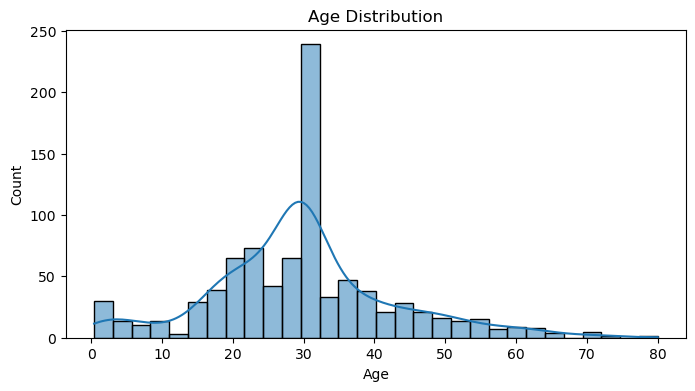

In [30]:
# Data Visualization
# Example: Histogram of age
plt.figure(figsize=(8, 4))
sns.histplot(df_train['Age'], bins=30, kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

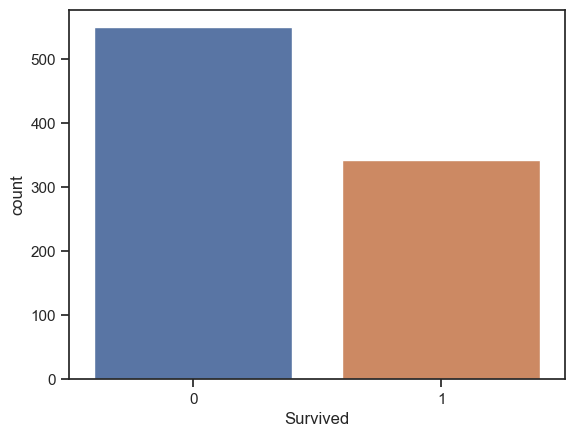

In [96]:
# Data Visualization
# Let's create some visualizations to better understand the data
sns.countplot(x="Survived", data=df_train)
plt.show()

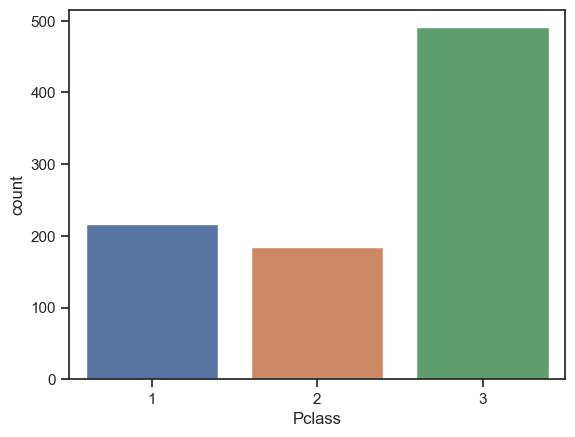

In [99]:
sns.countplot(x="Pclass", data=df_train)
plt.show()

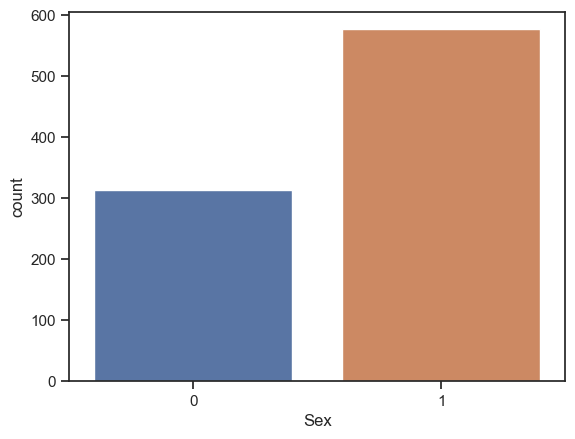

In [100]:
sns.countplot(x="Sex", data=df_train)
plt.show()

<Axes: xlabel='Sex', ylabel='Survived'>

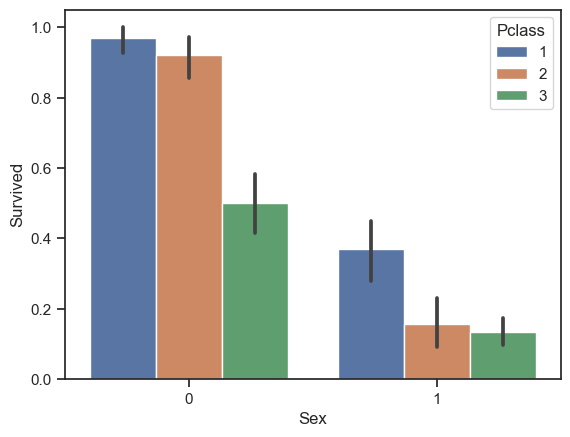

In [101]:
#Pclass, Sex, Cabin, Embarked, Sibsp/Parch
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=df_train)

<Axes: xlabel='Embarked', ylabel='count'>

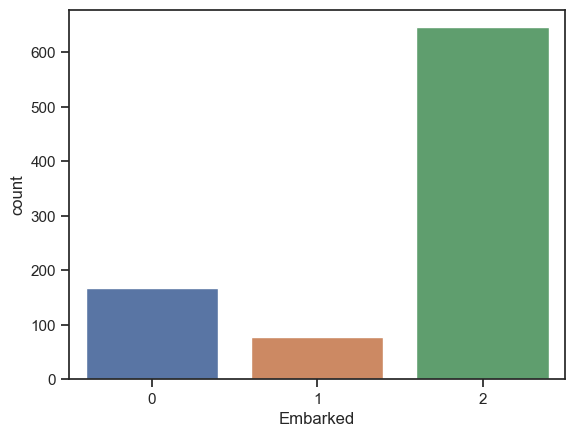

In [102]:
sns.countplot(x="Embarked", data=df_train)

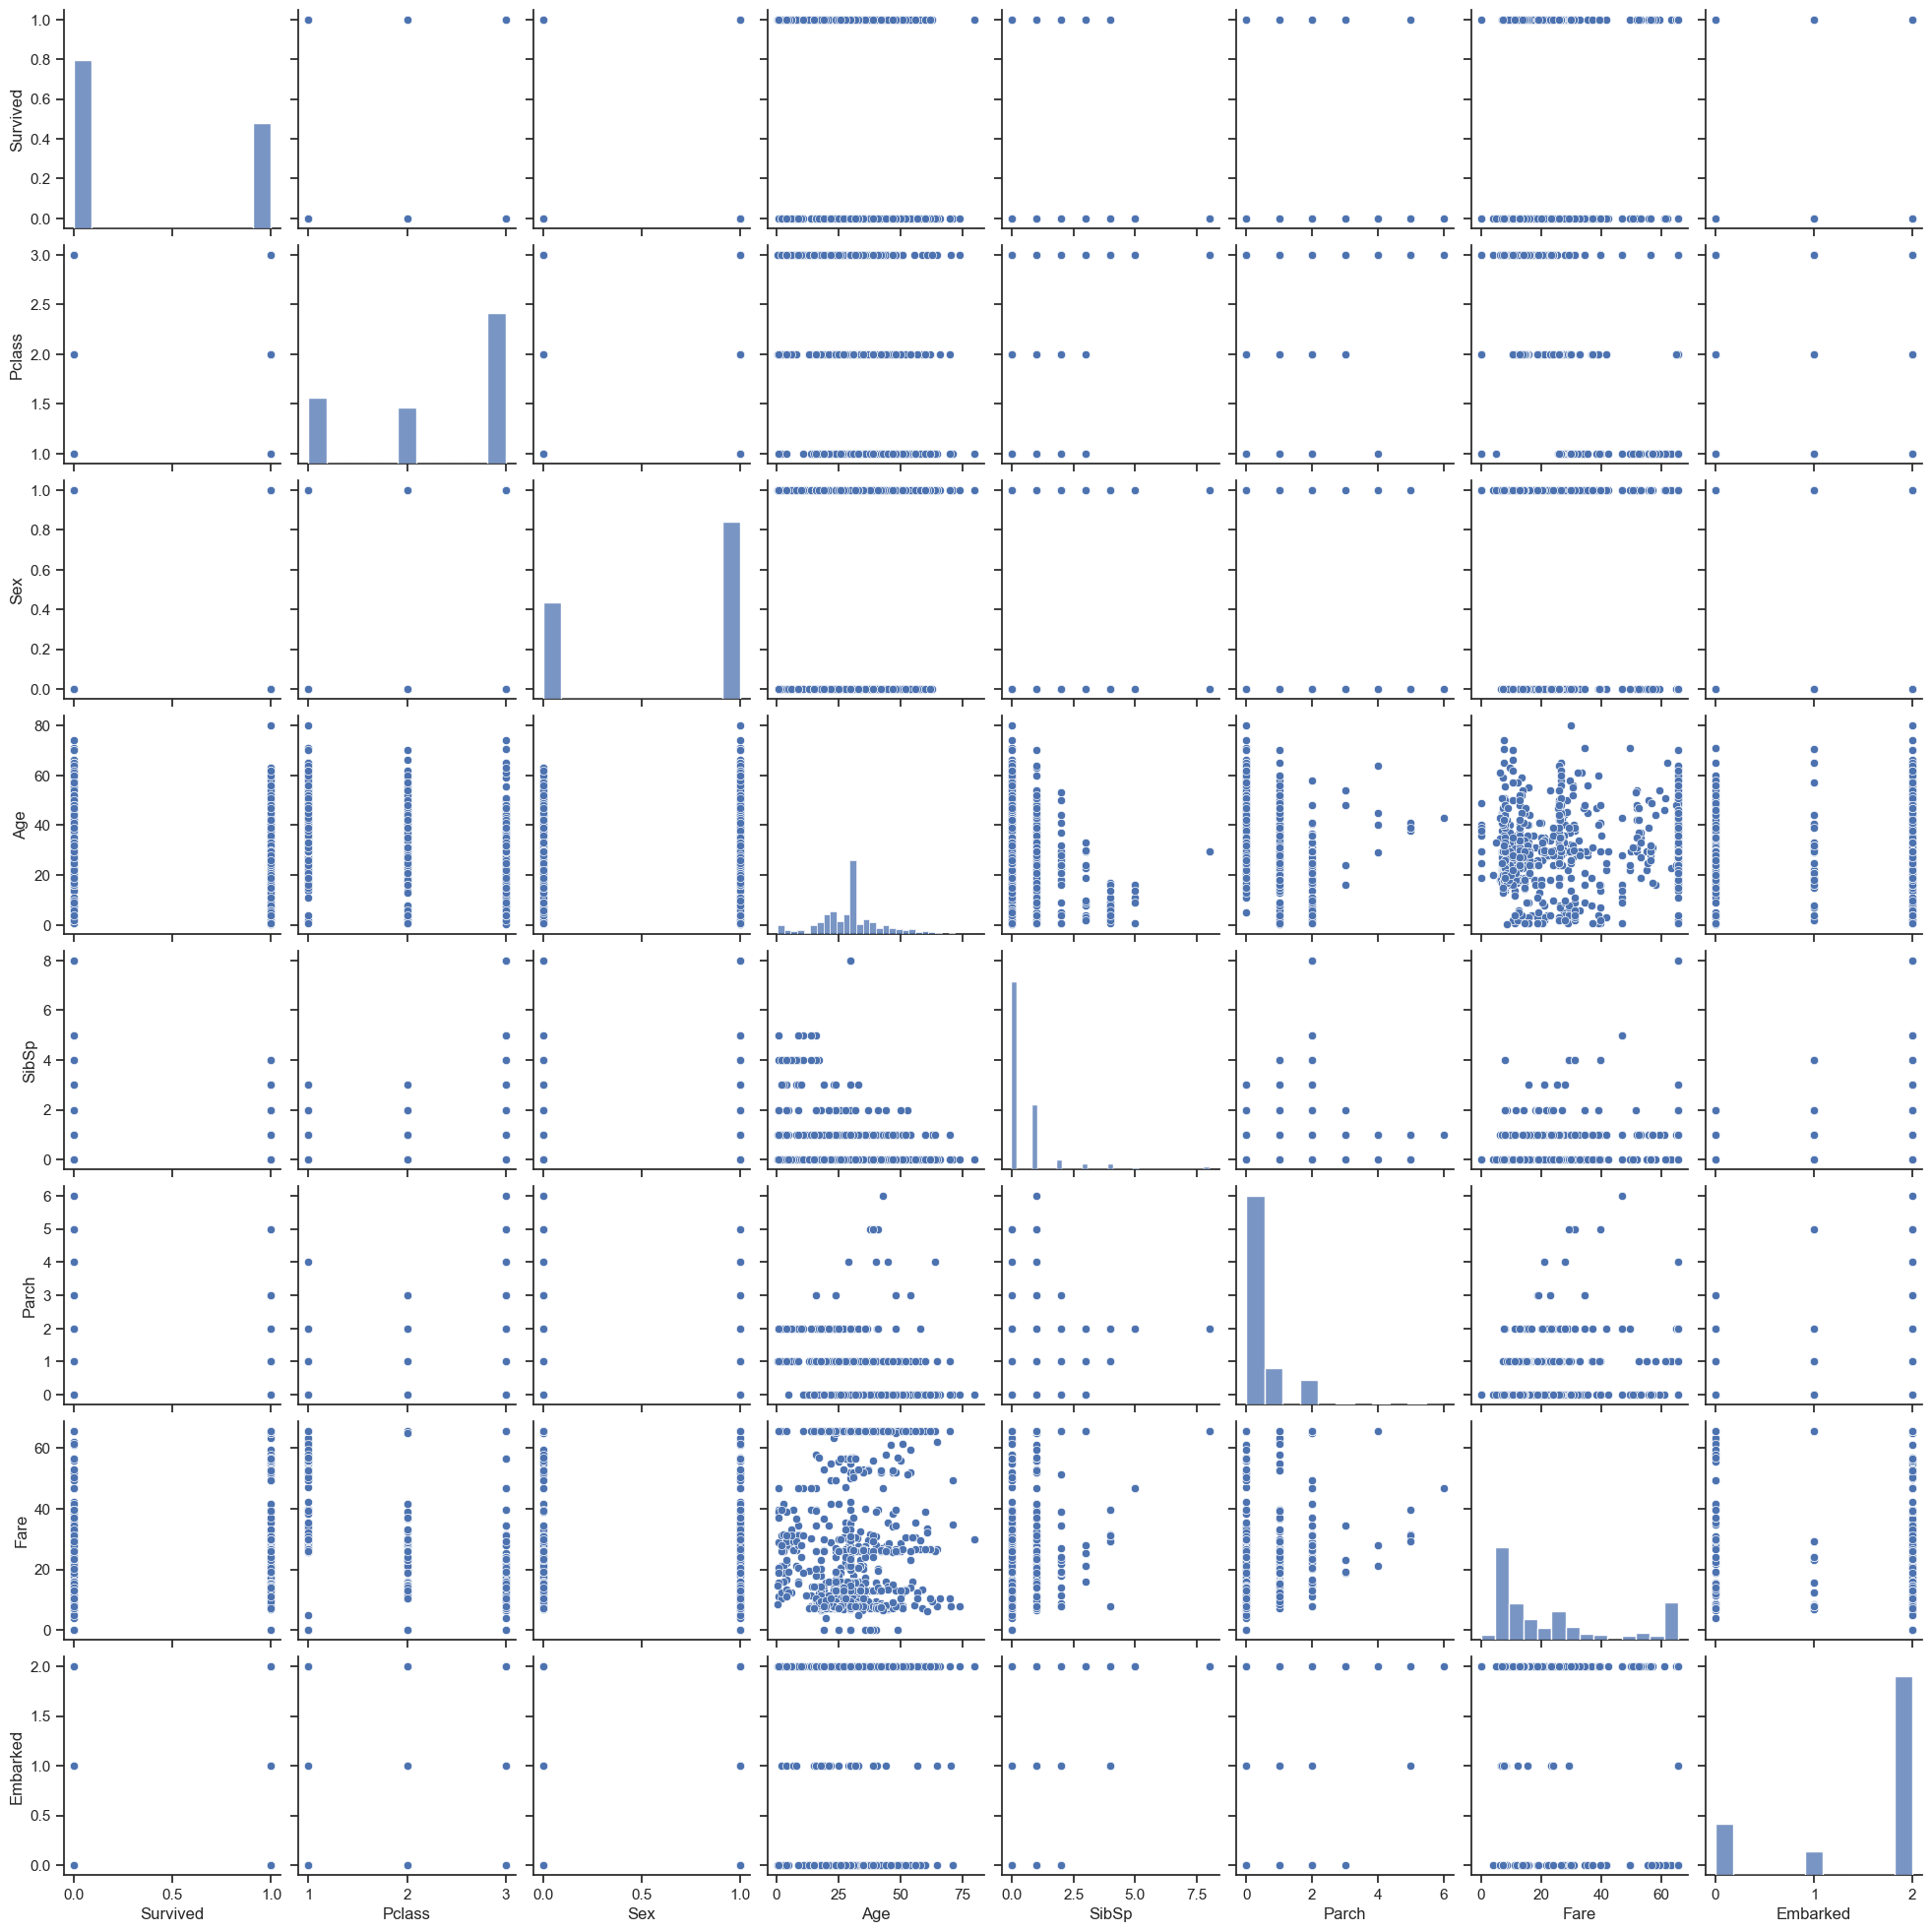

In [97]:
sns.pairplot(df_train)

# Outlier Detection

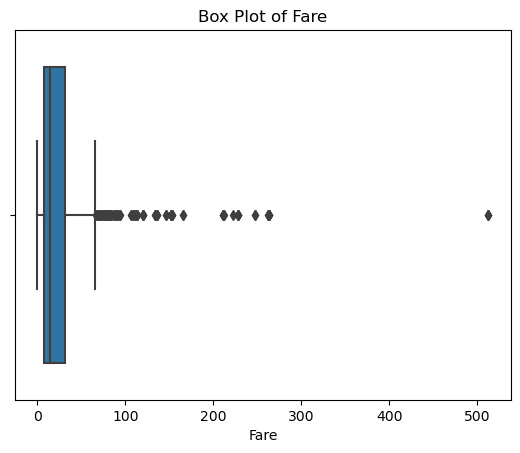

In [31]:
# plot a box plot of the Fare column to see its outliers
sns.boxplot(x=df_train['Fare'])
plt.xlabel('Fare')
plt.title('Box Plot of Fare')
plt.show()

In [32]:
#Removing the Outliers
Q1 = df_train['Fare'].quantile(0.25)
Q3 = df_train['Fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + whisker_width*IQR
df_train['Fare']=np.where(df_train['Fare']>upper_whisker,upper_whisker,np.where(df_train['Fare']<lower_whisker,lower_whisker,df_train['Fare']))

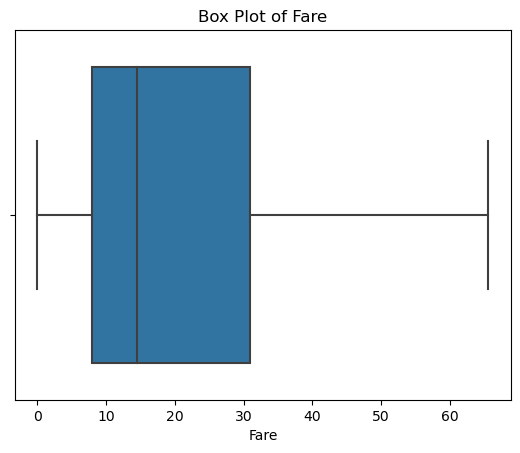

In [33]:
sns.boxplot(x=df_train['Fare'])
plt.xlabel('Fare')
plt.title('Box Plot of Fare')
plt.show()

In [34]:
corr=df_train.corr()
corr


C:\Users\Sivaji\AppData\Local\Temp\ipykernel_14356\880047673.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df_train.corr()


,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.317430
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.715300
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.137752
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.332021
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.292616
Fare,0.317430,-0.715300,0.137752,0.332021,0.292616,1.000000


C:\Users\Sivaji\AppData\Local\Temp\ipykernel_14356\914637124.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_train.corr()


<Axes: >

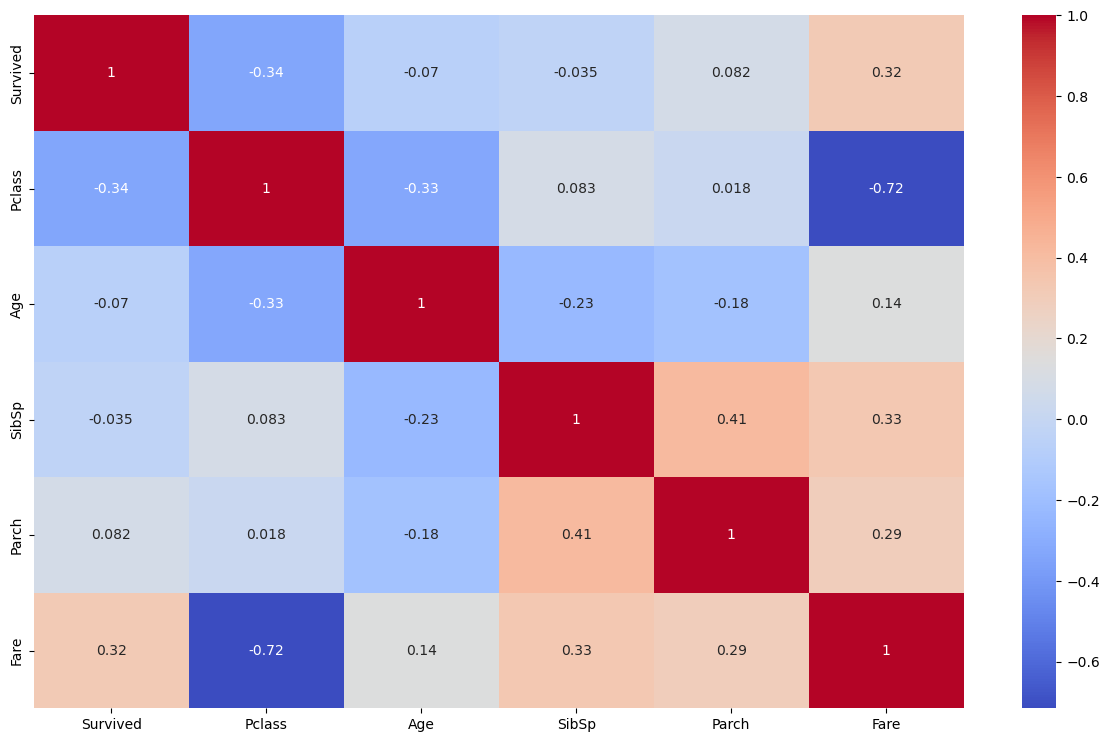

In [44]:
corr = df_train.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Splitting Dependent and Independent variables

In [120]:
#Split the data into independent 'X' and dependent 'Y' variables
X = df_train.iloc[:, 1:8].values 
Y = df_train.iloc[:, 0].values 

# Encoding

In [119]:
#Encoding categorical data values (Transforming object data types to integers)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#Encode sex column
df_train.iloc[:,2]= labelencoder.fit_transform(df_train.iloc[:,2].values)
#print(labelencoder.fit_transform(titanic.iloc[:,2].values))

#Encode embarked
df_train.iloc[:,7]= labelencoder.fit_transform(df_train.iloc[:,7].values)
#print(labelencoder.fit_transform(titanic.iloc[:,7].values))

#Print the NEW unique values in the columns
print(df_train['Sex'].unique())
print(df_train['Embarked'].unique())


[1 0]
[2 0 1]


# Splitting Data into Train and Test

In [116]:
# Split the dataset into 80% Training set and 20% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [117]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(623, 5) (268, 5) (623, 0) (268, 0)


# Feature Scaling

In [118]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)